## Thanks for coming to see my notebook!
## I am not a fluent English writer, so I apologize if I am difficult to understand!

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [70]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv",index_col="id")
original_df = pd.read_csv("/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e10/test.csv",index_col="id")

### Add 'Flag' to distinguish between the original and the generated dataset.
### Next, we check the structure of the data

In [71]:
train_df["flag"] = 1
print(train_df.shape)
train_df.head()

(117564, 10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
id,,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0,1
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0,1
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0,1
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0,1
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0,1


In [72]:
original_df["flag"] = 0
print(original_df.shape)
original_df.head()

(17898, 10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0


In [73]:
test_df["flag"] = 1
print(test_df.shape)
test_df.head()

(78377, 9)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,flag
id,,,,,,,,,
117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781,1
117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822,1
117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499,1
117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240,1
117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775,1


### Combine train_df and original_df and Check the data type and null.

In [74]:
train_df = pd.concat([train_df,original_df])
train_df = train_df.reset_index(drop=True)

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135462 entries, 0 to 135461
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       135462 non-null  float64
 1   SD                    135462 non-null  float64
 2   EK                    135462 non-null  float64
 3   Skewness              135462 non-null  float64
 4   Mean_DMSNR_Curve      135462 non-null  float64
 5   SD_DMSNR_Curve        135462 non-null  float64
 6   EK_DMSNR_Curve        135462 non-null  float64
 7   Skewness_DMSNR_Curve  135462 non-null  float64
 8   Class                 135462 non-null  int64  
 9   flag                  135462 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 10.3 MB


In [76]:
train_df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
flag                    0
dtype: int64

In [77]:
train_df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
count,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000
mean,111.226059,46.691866,0.500110,1.871045,12.048998,26.208626,8.072643,95.331370,0.093059,0.867874
std,25.006347,6.206032,1.118996,6.470713,27.100503,19.967365,3.936322,84.035017,0.290517,0.338629
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000,0.000000
25%,104.033203,43.253382,0.047931,-0.188956,2.072742,14.915976,6.646443,47.649302,0.000000,1.000000
50%,116.503906,47.381724,0.191286,0.099390,2.808528,18.218805,8.441692,83.391792,0.000000,1.000000
75%,126.351562,50.874453,0.406383,0.721346,4.228261,24.988237,10.087258,124.127998,0.000000,1.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000,1.000000


### Histograms help you understand the distribution of each piece of data.

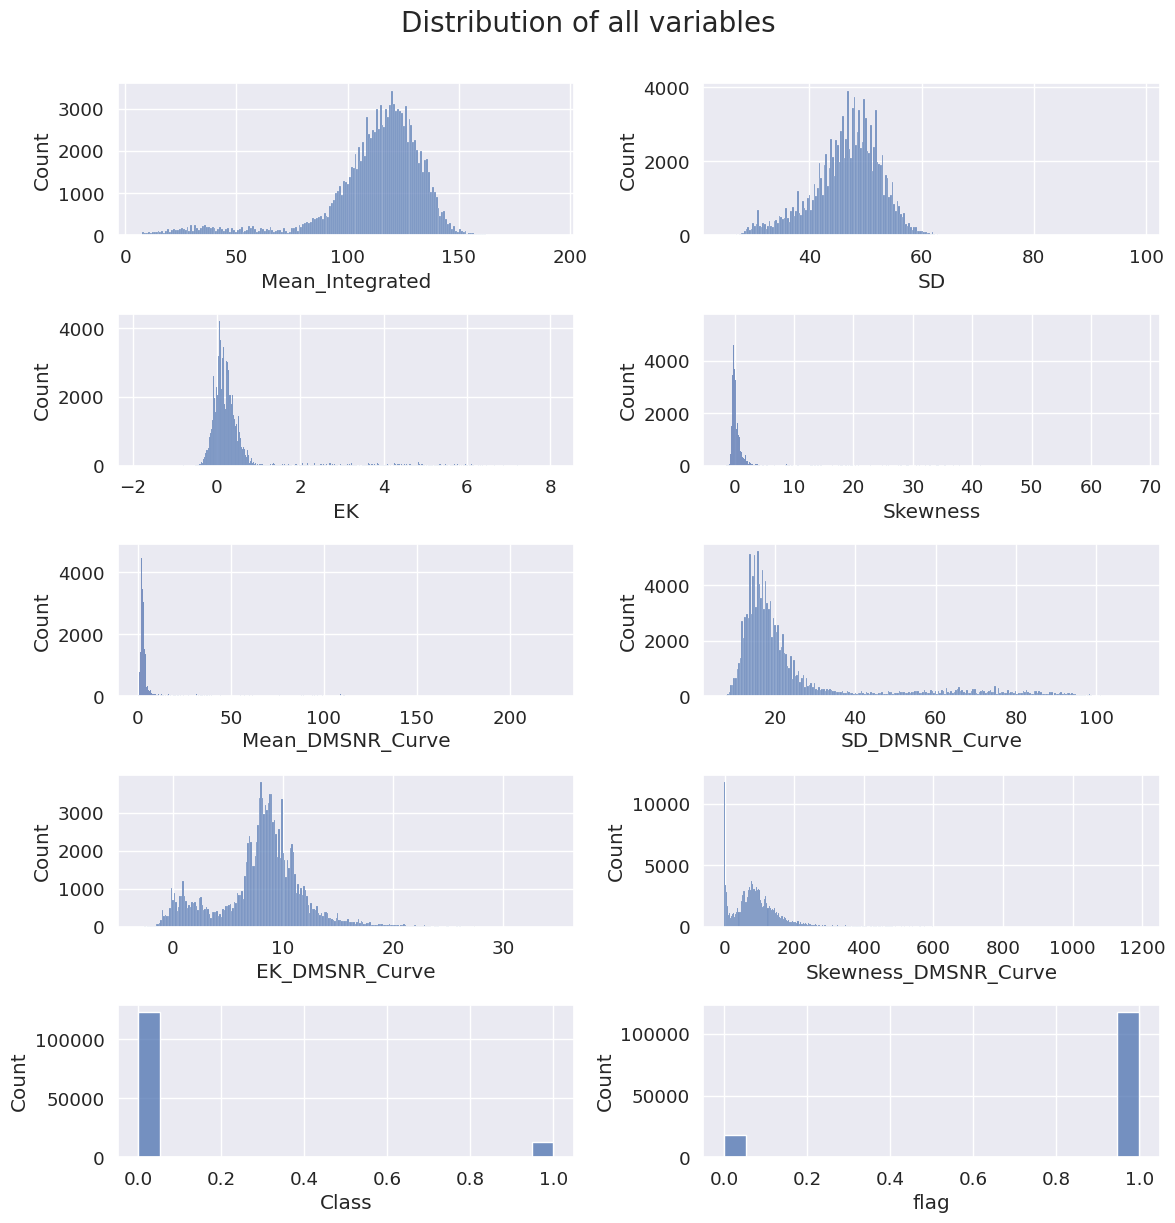

In [78]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

## According to the original dataset, each column has the following meaning.



```
・Mean_Integrated: Mean of Observations

・SD: Standard deviation of Observations

・EK: Excess kurtosis of Observations

・Skewness: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

・Mean _ DMSNR _ Curve: Mean of DM SNR CURVE of Observations

・SD _ DMSNR _ Curve: Standard deviation of DM SNR CURVE of Observations

・EK _ DMSNR _ Curve: Excess kurtosis of DM SNR CURVE of Observations

・Skewness _ DMSNR _ Curve: Skewness of DM SNR CURVE of Observations

・Class: Class 0 - 1

WHAT IS DM SNR CURVE:

Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.
```


https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction

### Using correlation coefficients and heat maps, find variables that are significantly involved in TARGET.

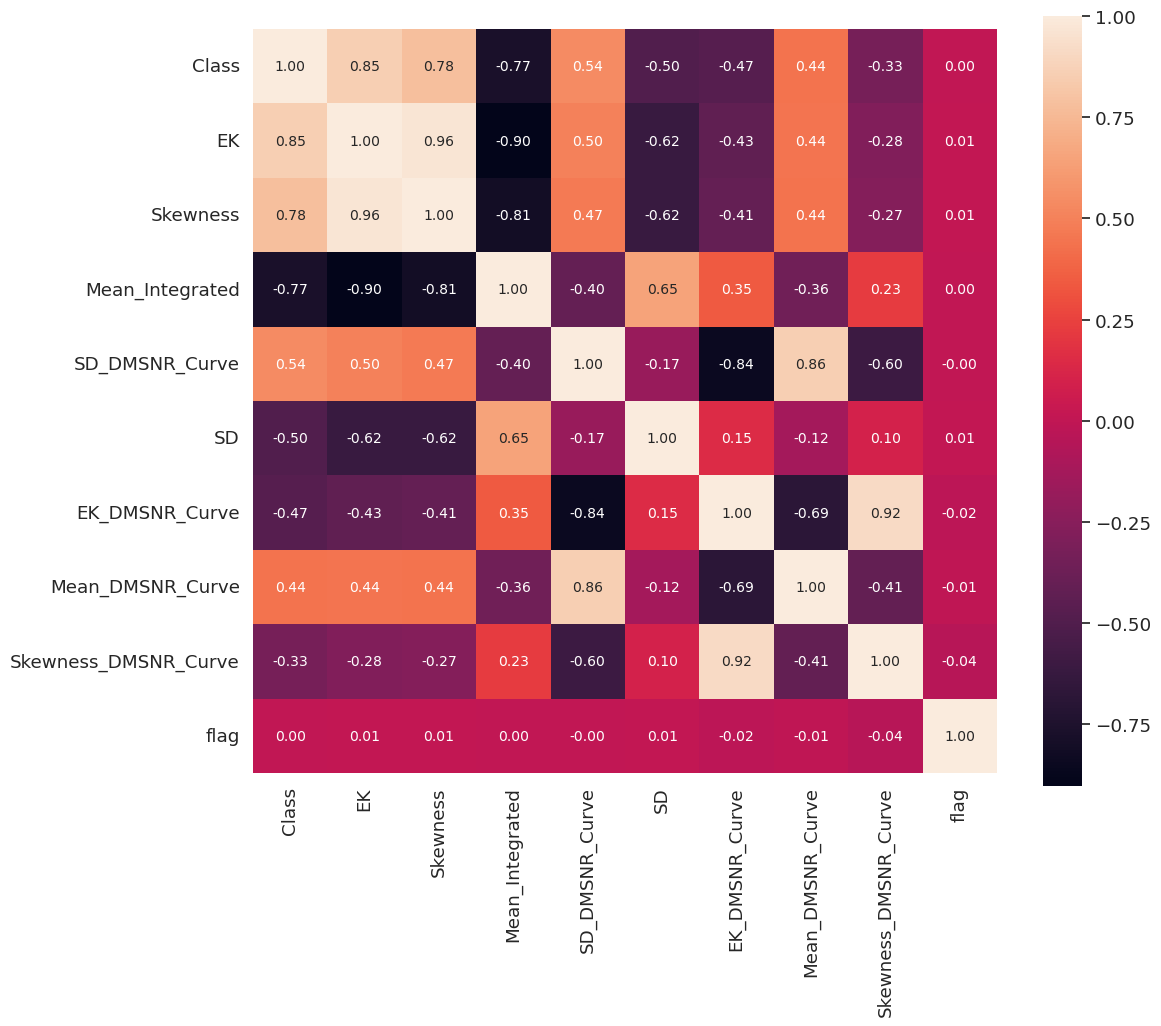

In [79]:
TARGET = "Class"
k = 15 # number of variables for heatmap
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Let's try machine learning in this state...

### Ver2.　The probability was explicitly stated.

In [80]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [81]:
y = train_df[TARGET]
X = train_df.drop(TARGET,axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [82]:
xgb_params = {
        'max_depth': 4,
        'objective': 'binary:logistic',
        'seed':42,
        'n_estimators':20000,
        'learning_rate':0.05,
        'n_jobs': -1,
        'tree_method':'gpu_hist'
        }

model_xgb = xgb.XGBClassifier(**xgb_params)
model_xgb.fit(X_train,
              y_train,
              eval_metric='logloss', 
              eval_set=[(X_valid, y_valid)],
              early_stopping_rounds=10,
              verbose=1000)
model_xgb.predict_proba(X_valid)

[0]	validation_0-logloss:0.64621
[250]	validation_0-logloss:0.03536


array([[9.7782654e-01, 2.2173438e-02],
       [9.5649207e-01, 4.3507945e-02],
       [9.9928045e-01, 7.1954424e-04],
       ...,
       [3.9545238e-02, 9.6045476e-01],
       [9.9876148e-01, 1.2384987e-03],
       [9.9951351e-01, 4.8649136e-04]], dtype=float32)

In [83]:
lgb_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'learning_rate':0.05,
        'task': 'train', 
        'seed':42,
        'n_estimators':20000,
        'device':'gpu'
        
}
model_lgb = lgb.LGBMClassifier(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=10)
model_lgb.predict_proba(X_valid)

[100]	training's binary_logloss: 0.0298984	valid_1's binary_logloss: 0.0358708


array([[9.78058434e-01, 2.19415660e-02],
       [9.80780640e-01, 1.92193599e-02],
       [9.99063739e-01, 9.36261424e-04],
       ...,
       [1.16683464e-01, 8.83316536e-01],
       [9.98533430e-01, 1.46656974e-03],
       [9.99348958e-01, 6.51041923e-04]])

In [84]:
cb_params = {
        'custom_loss' :['Logloss'],
        'learning_rate':0.05,
        'iterations':20000,
        
}
model_cb = cat.CatBoostClassifier(**cb_params)
model_cb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=10)
model_cb.predict(X_valid,prediction_type='Probability')

0:	learn: 0.5570406	test: 0.5570739	test1: 0.5572042	best: 0.5572042 (0)	total: 30.7ms	remaining: 10m 14s
100:	learn: 0.0361005	test: 0.0361104	test1: 0.0360967	best: 0.0360967 (100)	total: 2.81s	remaining: 9m 13s
200:	learn: 0.0336519	test: 0.0336613	test1: 0.0352426	best: 0.0352398 (193)	total: 5.45s	remaining: 8m 56s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.03523982681
bestIteration = 193

Shrink model to first 194 iterations.


array([[9.66508339e-01, 3.34916606e-02],
       [9.88960315e-01, 1.10396850e-02],
       [9.99647281e-01, 3.52718605e-04],
       ...,
       [1.81773549e-02, 9.81822645e-01],
       [9.94072009e-01, 5.92799114e-03],
       [9.99771181e-01, 2.28818784e-04]])

## Create a submission file

In [89]:
def norm(preds):
    return (preds - np.min(preds)) / (np.max(preds) - np.min(preds))

sub = pd.read_csv("/kaggle/input/playground-series-s3e10/sample_submission.csv")
sub[TARGET] = norm(model_xgb.predict_proba(test_df))
sub.to_csv("/kaggle/working/xgbproba.csv",index=False)
sub[TARGET] = norm(model_lgb.predict_proba(test_df))
sub.to_csv("/kaggle/working/lgbproba.csv",index=False)
sub[TARGET] = norm(model_cb.predict(test_df,prediction_type='Probability')[:,1])
sub.to_csv("/kaggle/working/cbproba.csv",index=False)

In [90]:
sub[TARGET] = (norm(model_cb.predict(test_df,prediction_type='Probability')[:,1]) + norm(model_lgb.predict_proba(test_df)[:,1]) + norm(model_xgb.predict_proba(test_df)[:,1]))/3
sub.to_csv("/kaggle/working/mixproba.csv",index=False)

## mixproba.csv score:0.03306